# Summary 
A lasso regression analysis was conducted to identify a subset of variables from a collection of 11 categorical and quantitative predictor variables that best predicted a quantitative response variable measuring the perception of the US economy.


## The research question is 
 **To what extent is the perception of the US situation associated with the level of income ?**

## The variables of interest in our research question
"W1_P20 is the Personnal Annual income")
"W1_G2 is the US economy's situation")
"W1_F1 is the Percentage of how the respondants think about the future")
Explanatory variables :

**Target is the US economy's situation**, this variable has been managed previously. The _W1_G2_ variable has been transformed into a two level categorical variable, called **economy_situation**.

** The variables used in the analysis are the following :**
Predictors (Xi) that we have tested:
- W1_A1 How interested are you in what’s going on in government and politics?
- W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
- W1_P20 Which of the following income groups includes YOUR personal annual income (Do not include the income of other members of your household)?
- PPAGE: Age
- PPINCIMP: Household Income
- W1_P11: Is anyone in your household currently unemployed?
- PPETHM: Race / Ethnicity
- W1_F1 When you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?
- PPETHM: Race / Ethnicity
- W1_D1 : [Barack Obama] How would you rate
- W1_A12 Do you approve or disapprove of the way Barack Obama is handling his job as President?
- W1_M1: What is your religion?

Data were randomly split into a training set that included 70% of the observations and a test set that included 30% of the observations. The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

Has we have already seen the variable :

- W1_A1 How interested are you in what’s going on in government and politics?),
- the rating of the US president at the time of the data collection (W1_D1 : [Barack Obama] How would you rate),
- and, the Household Income (PPINCIMP).

The selected model was less accurate in predicting the perception of the US economy's situation in the test data. The R-square values were 0.02 and 0.013, indicating that the selected model explained only 2% and 1% of the variance in US economy's situation for the training and test sets, respectively.

In [69]:
# Let's start by importing the libraries we will need :

# Libraries

import pandas as pd
import numpy as np
import seaborn as sns  # for plots
import matplotlib.pyplot as plt  # as plt
import statsmodels.formula.api as smf  # statsmodels
import statsmodels.stats.multicomp as multi  # statsmodels and posthoc test
import statsmodels.api as sm  # Statsmodel for the qqplots
import scipy.stats  # For the Chi-Square test of independance

# Machine learning libraries
# Libraries for decision trees

from pandas import Series, DataFrame
import os

import sklearn.metrics

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
#from sklearn.linear_model import lassoLarsCV
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

import graphviz

# Feature Importance - for the random trees
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import mean_squared_error # To compute the mean squarre error in the Lasso regression analysis;

In [70]:
df = pd.read_csv("ool_pds.csv", low_memory=False)

### Let's do a little bit of data management in our variables of interest
1. Removing / recoding variables to nan.
2. Creating a new variable and adding it to our dataset.
3. Removing all NAs from the dataset.

In [83]:
df["W1_P20"] = df["W1_P20"].replace(-1, np.nan)
df["W1_G2"] = df["W1_G2"].replace(-1, np.nan)
df["W1_F1"] = df["W1_F1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(998, np.nan)
df["W1_A12"] = df["W1_A12"].replace(-1, np.nan)
df["W1_C1"] = df["W1_C1"].replace(-1, np.nan)
df["W1_A1"] = df["W1_A1"].replace(-1, np.nan)
df["W1_M1"] = df["W1_M1"].replace(-1, np.nan)
df["W1_P11"] = df["W1_P11"].replace(-1, np.nan)
df["PPINCIMP"] = df["PPINCIMP"].replace(-1 , np.nan)
df["PPINCIMP"] = df["PPINCIMP"].replace(-2, np.nan)
df["PPETHM"] = df["PPETHM"].replace(-1, np.nan)
df["PPETHM"] = df["PPETHM"].replace(-2, np.nan)

In [72]:
# The response variable in our research question

def economy_situation(row):
    if row["W1_G2"] == 1:
        return 1
    if row["W1_G2"] == 2:
        return 0
    if row["W1_G2"] == 3:
        return 0

# This variable is then added to the dataframe
df["economy_situation"] = df.apply(lambda row: economy_situation(row), axis=1)

df["economy_situation"] = df["economy_situation"].astype("category")

In [73]:
df_clean = df.dropna()

In [74]:
# Select predictor variables and target variable as separate data sets  
predvar = df_clean[["W1_A1", "W1_C1", "W1_P20", "PPAGE", "PPINCIMP", "W1_P11", "PPETHM", 
                    "W1_F1", "W1_D1", "W1_A12", "W1_M1"]]

# This is the target variable
target = df_clean.economy_situation
#%%
# standardize predictors to have mean=0 and sd=1
predictors = predvar.copy()

In [75]:
from sklearn import preprocessing
#%%
predictors["W1_A1"] = preprocessing.scale(predictors["W1_A1"].astype("float64"))
predictors["W1_C1"] = preprocessing.scale(predictors["W1_C1"].astype("float64"))
predictors["W1_P20"] = preprocessing.scale(predictors["W1_P20"].astype("float64"))
predictors["PPAGE"] = preprocessing.scale(predictors["PPAGE"].astype("float64"))
predictors["PPINCIMP"] = preprocessing.scale(predictors["PPINCIMP"].astype("float64"))
predictors["W1_P11"] = preprocessing.scale(predictors["W1_P11"].astype("float64"))
predictors["PPETHM"] = preprocessing.scale(predictors["PPETHM"].astype("float64"))
predictors["W1_F1"] = preprocessing.scale(predictors["W1_F1"].astype("float64"))
predictors["W1_D1"] = preprocessing.scale(predictors["W1_D1"].astype("float64"))
predictors["W1_A12"] = preprocessing.scale(predictors["W1_A12"].astype("float64"))
predictors["W1_M1"] = preprocessing.scale(predictors["W1_M1"].astype("float64"))
#%%

In [76]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, 
                                                              target, 
                                                              test_size=.3, 
                                                              random_state=123)

In [77]:
#%%
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))


{'PPAGE': 0.0044014939989742144,
 'PPETHM': -0.0047909703909866106,
 'PPINCIMP': 0.022517616947266169,
 'W1_A1': -0.036192290740501752,
 'W1_A12': -0.086286734698875725,
 'W1_C1': 0.0,
 'W1_D1': 0.048341625137591812,
 'W1_F1': 0.0,
 'W1_M1': 0.022076603826042193,
 'W1_P11': 0.0,
 'W1_P20': 0.0071865733328414826}

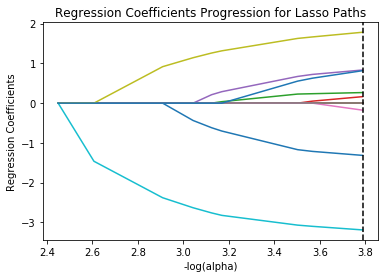

In [79]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_) # model.alphas_ is the result of the selection , -np.log10 make it easer to read
ax = plt.gca() # This set-up the axes.
plt.plot(m_log_alphas, model.coef_path_.T) # this plots the values of alpha on the horizontal access.
                                           # And the change in the regression coefficients in the coef_path_  
                                           # plt to plot the transform values of alpha on the horizontal access.
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

This plot shows the relative importance of the predictor selected at any step of the selection process, how the reggression coefficients changed with the addition of a new predictor at each step, as well as the steps at which each variable entered the model. Has we have already seen the variable :
- W1_A1 How interested are you in what’s going on in government and politics?), 
- the rating of the US president at the time of the data collection (W1_D1 : [Barack Obama] How would you rate), 
- and, the Household Income (PPINCIMP).

/Users/annick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


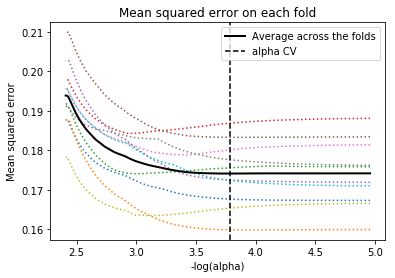

In [80]:
#%%
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()

# Old codes ; these are depreciated
#plt.plot(m_log_alphascv, model.cv_mse_path_, ':') This is depreciated
#plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
#         label='Average across the folds', linewidth=2) This is depreciated

plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
        label = 'Average across the folds', linewidth = 2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

We can see that there is variability across the individual cross-validation folds in the training data set, but the change in the mean square error as variables are added to the model follows the same pattern for each fold.
Initially it decreases rapidly and then levels off to a point at which adding more predictors doesn't lead to much reduction in the mean square error. 

In [81]:
#%%
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)
#%%

training data MSE
0.171993937005
test data MSE
0.164897834284


In [82]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.112496800867
test data R-square
0.0849102742384
